# Modelación y Simulación - Laboratorio 2 Ejercicios 4 al 8
### Ana Laura Tschen 221645
### Sebastian Garcia 22291

# Ejercicio 4:
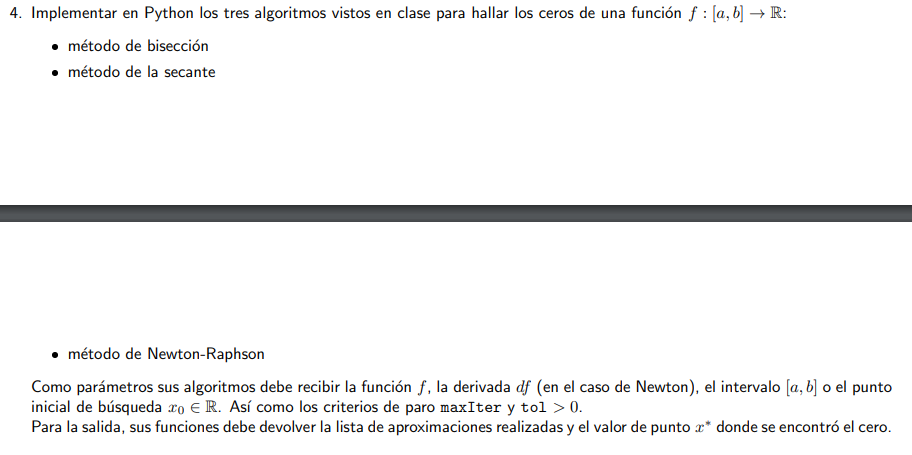

## Ejercicio 5: Hallar todos los ceros de la función $g(x) = x^2 + 1/(x − 7)$ con al menos 7 decimales de precisión. Compare las soluciones obtenidas con cada uno de los algoritmos anterioes en términos del número de iteraciones.


# Ejercicio 6:
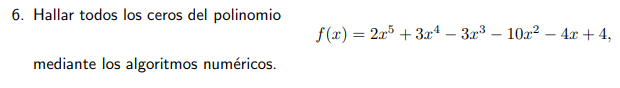

# Ejercicio 8: 
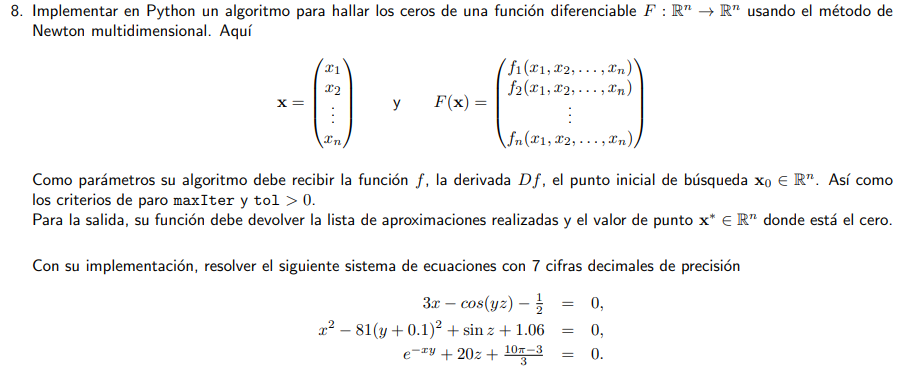